In [4]:
#libraries
from matplotlib_venn import venn3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
import matplotlib.ticker as ticker

In [5]:
#prepping the data
path = 'Sleep_Efficiency.csv'
data = pd.read_csv(path)
data.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [6]:
data.drop_duplicates(subset='ID', inplace=True)
data.drop(columns='ID', axis=1, inplace=True)
print(data.columns)


Index(['Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')


In [7]:
# Impute missing values
print("Column containing missing values:")
print(data.columns[data.isnull().any()].tolist())

mode_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

data['Awakenings'] = mode_imputer.fit_transform(data[['Awakenings']])
data['Exercise frequency'] = mode_imputer.fit_transform(data[['Exercise frequency']])
data['Caffeine consumption'] = mean_imputer.fit_transform(data[['Caffeine consumption']])
data['Alcohol consumption'] = mean_imputer.fit_transform(data[['Alcohol consumption']])

print('\n\nnull values sum in each column after imputation')
print(data.isnull().sum())



Column containing missing values:
['Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']


null values sum in each column after imputation
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64


In [8]:
## convert date time to time float value
def datetime_to_float(d):
    t = str(d).split(":")
    m, s = float(t[-2])/60., float(t[-1])/3600.
    h = float(t[0].split(" ")[-1])
    
    return h+m+s

## Create a midnight normalization for the bedtime
def norm_midnight(dt):
    if(dt > 12):
        dt = dt - 24
    return dt

In [9]:
## Add the start sleep time in a float value to the DataFrame
time_list = []
for idx in range(0, len(data.index)):
    dt = datetime_to_float(data.loc[idx, 'Bedtime'])
    time_list.append(norm_midnight(dt))

data.insert(4, "Normalized Bedtime", time_list, True)
data.head()

,Age,Gender,Bedtime,Wakeup time,Normalized Bedtime,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,1.0,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,2.0,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,-2.5,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,2.5,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,1.0,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [10]:
data['Smoking status'] = data['Smoking status'].map({'Yes': 1, 'No': 0})

# data=pd.concat([data,pd.get_dummies(data['Gender'])], axis=1)
# data=data.drop('Gender', axis=1)
data.columns = data.columns.str.strip()
data

,Age,Gender,Bedtime,Wakeup time,Normalized Bedtime,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,1.0,6.0,0.88,18,70,12,0.0,0.000000,0.0,1,3.0
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,2.0,7.0,0.66,19,28,53,3.0,0.000000,3.0,1,3.0
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,-2.5,8.0,0.89,20,70,10,1.0,0.000000,0.0,0,3.0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,2.5,6.0,0.51,23,25,52,3.0,50.000000,5.0,1,1.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,1.0,8.0,0.76,27,55,18,3.0,0.000000,3.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,-2.0,7.5,0.91,22,57,21,0.0,0.000000,0.0,0,5.0
448,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,-3.0,6.0,0.74,28,57,15,4.0,25.000000,0.0,0,3.0
449,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,-1.0,8.5,0.55,20,32,48,1.0,23.653396,3.0,1,0.0
450,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,-3.0,7.0,0.76,18,72,10,3.0,0.000000,0.0,0,3.0


In [11]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     452 non-null    int64  
 1   Gender                  452 non-null    object 
 2   Bedtime                 452 non-null    object 
 3   Wakeup time             452 non-null    object 
 4   Normalized Bedtime      452 non-null    float64
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              452 non-null    float64
 11  Caffeine consumption    452 non-null    float64
 12  Alcohol consumption     452 non-null    float64
 13  Smoking status          452 non-null    int64  
 14  Exercise frequency      452 non-null    fl

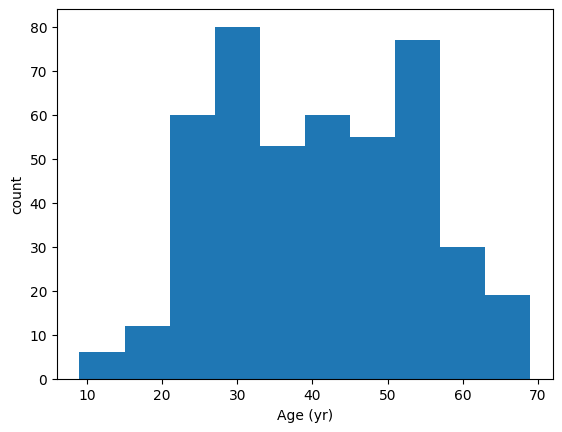

In [12]:
plt.hist(data['Age'])

plt.xlabel('Age (yr)')
plt.ylabel('count')

plt.show()

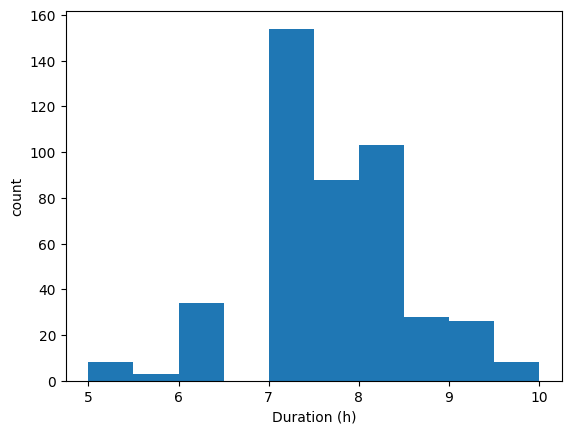

In [13]:
plt.hist(data['Sleep duration'])

plt.xlabel('Duration (h)')
plt.ylabel('count')

plt.show()

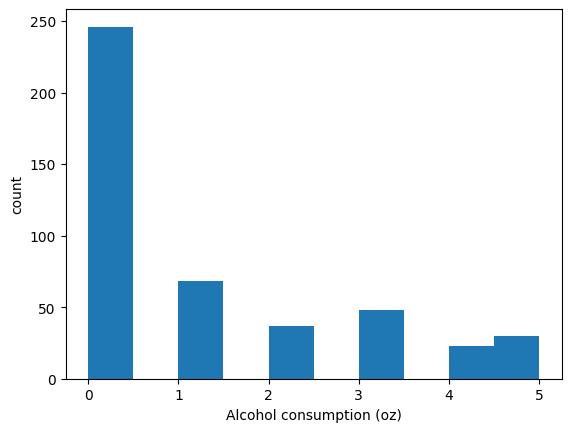

In [14]:
## The alcohol consumption that day
plt.hist(data['Alcohol consumption'])

plt.xlabel('Alcohol consumption (oz)')
plt.ylabel('count')

plt.show()

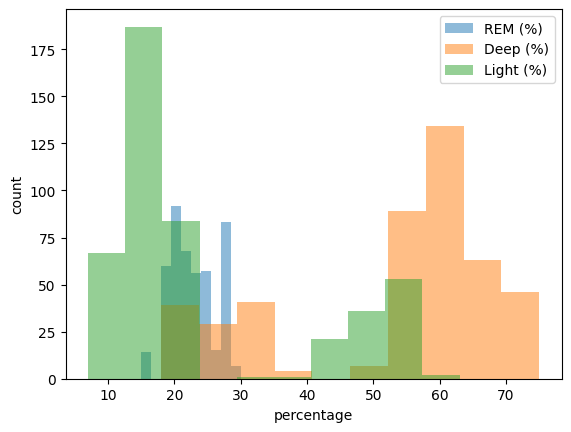

In [15]:
## Sleep percentage distributions
plt.hist(data['REM sleep percentage'], label = 'REM (%)', alpha = 0.5)
plt.hist(data['Deep sleep percentage'], label = 'Deep (%)', alpha = 0.5)
plt.hist(data['Light sleep percentage'], label = 'Light (%)', alpha = 0.5)

plt.xlabel('percentage')
plt.ylabel('count')

plt.legend()
plt.show()

In [16]:
## create a Pearson correlation matrix for all features in the DataFrame
columns = ['Age', 'Normalized Bedtime', 'Sleep duration', 'REM sleep percentage', 
    'Deep sleep percentage', 'Light sleep percentage', 'Sleep efficiency', 
    'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency', 'Awakenings']
df_corr = data[columns]

## create a Pearson correlation matrix for all features in the DataFrame
corr_matrix = df_corr.corr(method = 'pearson')

## remove the upper half of the symmetric matrix
corr_matrix = np.tril(corr_matrix, -1)
corr_matrix[corr_matrix == 0] = np.nan

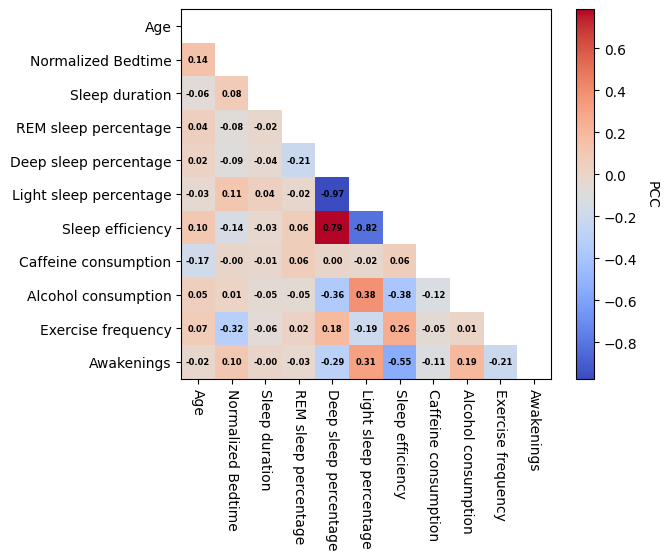

In [17]:
#jake code
fig, ax = plt.subplots()
ax1 = fig.add_subplot(111)

corr_im = ax1.matshow(corr_matrix, cmap = 'coolwarm', 
            vmin = np.nanmin(corr_matrix), 
            vmax = np.nanmax(corr_matrix))

tick_labels = list(df_corr.columns)
tick_vals = np.arange(len(tick_labels))

ax1.set_xticks(ticks = tick_vals, labels = tick_labels, rotation = -90)
ax1.xaxis.set_ticks_position('bottom')  
ax1.set_yticks(ticks = tick_vals, labels = tick_labels)

for (i, j), z in np.ndenumerate(corr_matrix):
    if(~np.isnan(z)):
        ax1.text(j, i, '{:0.2f}'.format(z), ha = 'center', va = 'center', fontsize = 6, fontweight="bold")

cbar = fig.colorbar(corr_im)
cbar.set_label('PCC', labelpad = 15., rotation=270.)

ax.axis('off')
plt.show()

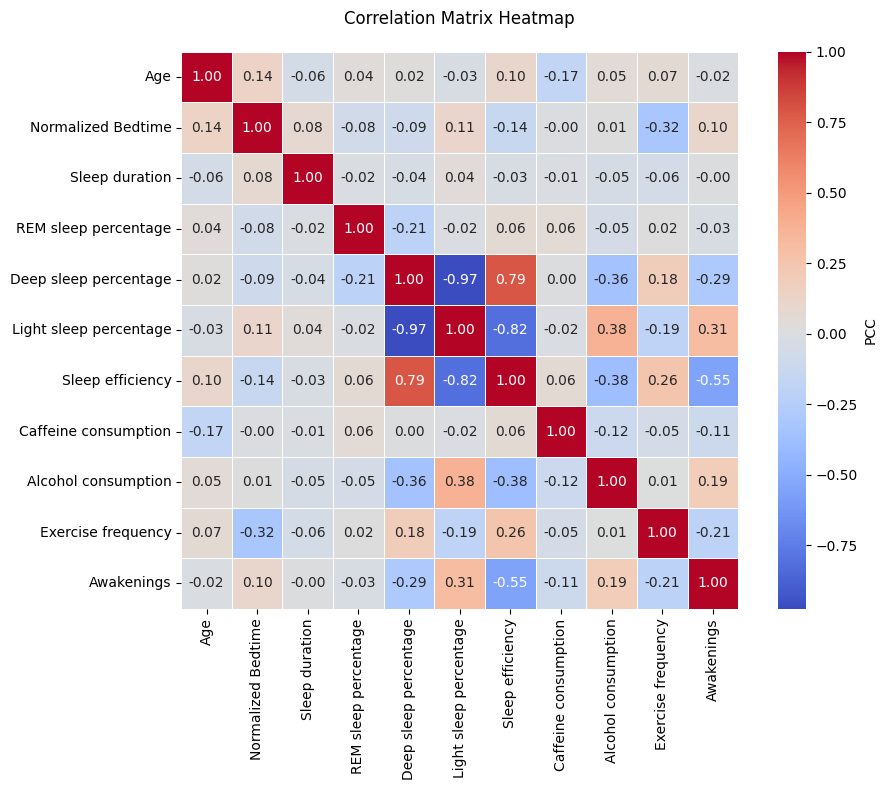

In [18]:
#deo code
#just to find the corelation of the variables/cols
corr_matrix = df_corr.corr() 

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, 
            cmap='coolwarm', 
            vmin=np.nanmin(corr_matrix), 
            vmax=np.nanmax(corr_matrix), 
            annot=True,         
            fmt=".2f",         
            square=True,        
            linewidths=0.5,   
            cbar_kws={"label": "PCC"})  

plt.title('Correlation Matrix Heatmap', pad=20)
plt.xticks(rotation=90)  
plt.yticks(rotation=0)  
plt.tight_layout()      
plt.show()


Number of smokers: 93
Number of alcoholics: 101
Number of Coffee drinkers: 72


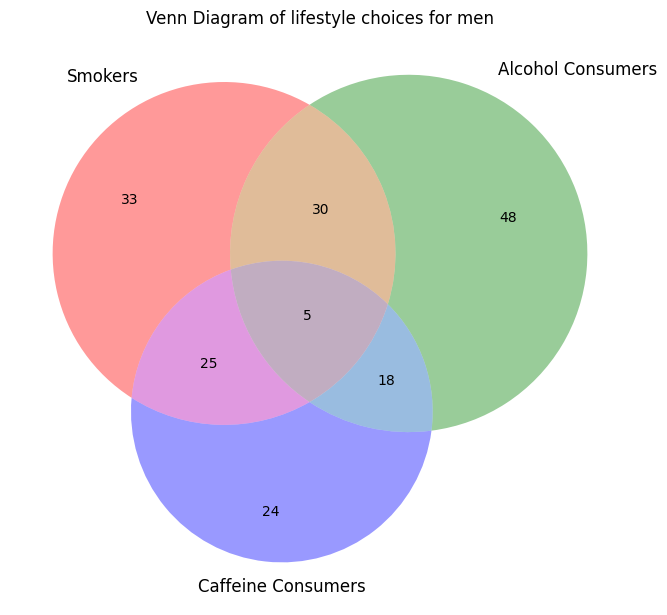

In [19]:
men_data = data[data['Gender'] == "Male"].copy()

num_smokers = men_data[men_data['Smoking status'] == 1].copy()
num_alcoholics = men_data[men_data['Alcohol consumption'] > 0].copy()
num_kafe = men_data[men_data['Caffeine consumption'] > 0].copy()

num_smokers_count = num_smokers.shape[0]
num_alcoholics_count = num_alcoholics.shape[0]
num_kafe_count = num_kafe.shape[0]
print(f"Number of smokers: {num_smokers_count}")
print(f"Number of alcoholics: {num_alcoholics_count}")
print(f"Number of Coffee drinkers: {num_kafe_count}")


smokers = set(men_data[men_data['Smoking status'] == 1].index)  
alcohol_consumers = set(men_data[men_data['Alcohol consumption'].notna() & (men_data['Alcohol consumption'] > 0)].index)  
caffeine_consumers = set(men_data[men_data['Caffeine consumption'].notna() & (men_data['Caffeine consumption'] > 0)].index)  

plt.figure(figsize=(8, 8))
venn3([smokers, alcohol_consumers, caffeine_consumers], set_labels=('Smokers', 'Alcohol Consumers', 'Caffeine Consumers'))

plt.title('Venn Diagram of lifestyle choices for men')
plt.show()

Number of smokers: 61
Number of alcoholics: 105
Number of Coffee drinkers: 169


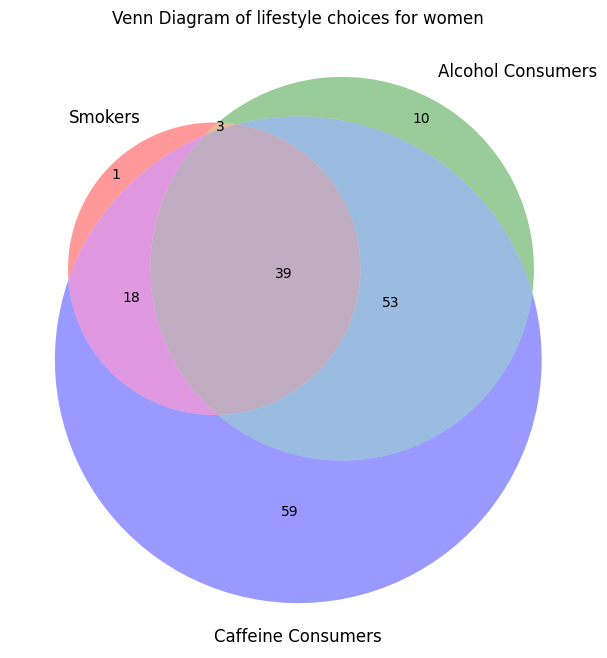

In [20]:

female_data = data[data['Gender'] == 'Female'].copy()

num_smokers = female_data[female_data['Smoking status'] == 1].copy()
num_alcoholics = female_data[female_data['Alcohol consumption'] > 0].copy()
num_kafe = female_data[female_data['Caffeine consumption'] > 0].copy()

num_smokers_count = num_smokers.shape[0]
num_alcoholics_count = num_alcoholics.shape[0]
num_kafe_count = num_kafe.shape[0]
print(f"Number of smokers: {num_smokers_count}")
print(f"Number of alcoholics: {num_alcoholics_count}")
print(f"Number of Coffee drinkers: {num_kafe_count}")


smokers = set(female_data[female_data['Smoking status'] == 1].index)  
alcohol_consumers = set(female_data[female_data['Alcohol consumption'].notna() & (female_data['Alcohol consumption'] > 0)].index)  
caffeine_consumers = set(female_data[female_data['Caffeine consumption'].notna() & (female_data['Caffeine consumption'] > 0)].index)  

plt.figure(figsize=(8, 8))
venn3([smokers, alcohol_consumers, caffeine_consumers], set_labels=('Smokers', 'Alcohol Consumers', 'Caffeine Consumers'))

plt.title('Venn Diagram of lifestyle choices for women')
plt.show()

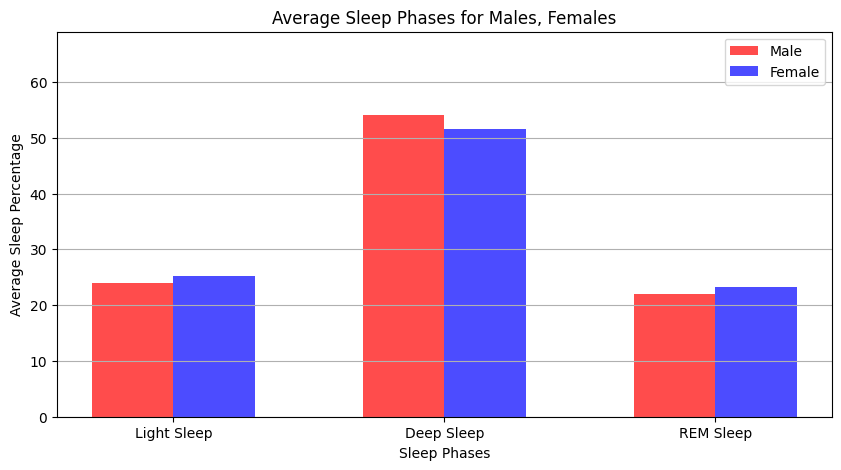

smoker means of all 3 sleep phases [23.94736842105263, 54.0, 22.05263157894737]
non smoker means of all 3 sleep phases [25.1875, 51.625, 23.1875]


In [21]:
#ah diara oscaaaar
male_data = data[data['Gender'] == 'Male'].copy()
female_data = data[data['Gender'] == 'Female'].copy()

male_data = [
    male_data['Light sleep percentage'].mean(), 
    male_data['Deep sleep percentage'].mean(), 
    male_data['REM sleep percentage'].mean()
]

female_data = [
    female_data['Light sleep percentage'].mean(), 
    female_data['Deep sleep percentage'].mean(), 
    female_data['REM sleep percentage'].mean()
]

sleep_phases = ['Light Sleep', 'Deep Sleep', 'REM Sleep']

plt.figure(figsize=(10, 5))

bar_width = 0.3
index = range(len(sleep_phases))

plt.bar(index, male_data, width=bar_width, label='Male', color='r', alpha=0.7)
plt.bar([i + bar_width for i in index], female_data, width=bar_width, label='Female', color='b', alpha=0.7)

plt.xlabel('Sleep Phases')
plt.ylabel('Average Sleep Percentage')
plt.title('Average Sleep Phases for Males, Females')
plt.xticks([i + bar_width / 2 for i in index], sleep_phases)  
plt.legend()
plt.grid(axis='y')
plt.ylim(0, 69) 
plt.show()
print("smoker means of all 3 sleep phases",male_data)
print("non smoker means of all 3 sleep phases", female_data)

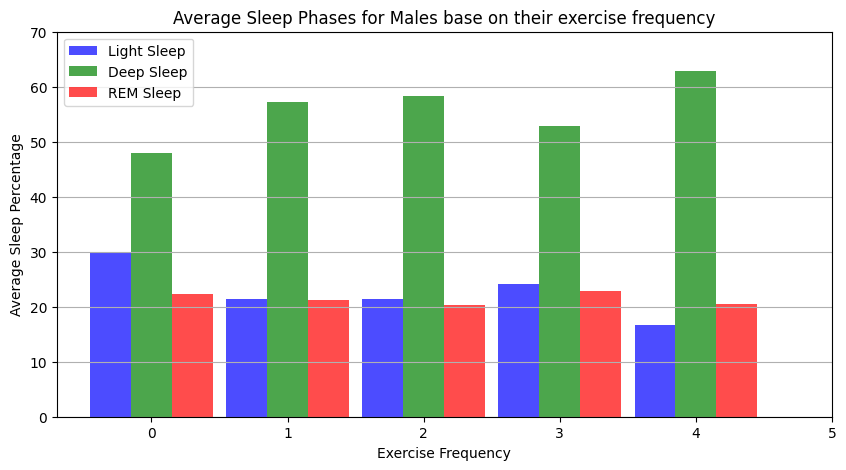

In [22]:
# Filter male data
male_data = data[data['Gender'] == 'Male'].copy()

# Extracting exercise data without loops
exercise_data0_male = male_data[male_data['Exercise frequency'] == 0].copy()
exercise_data1_male = male_data[male_data['Exercise frequency'] == 1].copy()
exercise_data2_male = male_data[male_data['Exercise frequency'] == 2].copy()
exercise_data3_male = male_data[male_data['Exercise frequency'] == 3].copy()
exercise_data4_male = male_data[male_data['Exercise frequency'] == 4].copy()
exercise_data5_male = male_data[male_data['Exercise frequency'] == 5].copy()

# Calculate the average sleep percentages
exercise_data0_male = [
    exercise_data0_male['Light sleep percentage'].mean(), 
    exercise_data0_male['Deep sleep percentage'].mean(), 
    exercise_data0_male['REM sleep percentage'].mean()
]

exercise_data1_male = [
    exercise_data1_male['Light sleep percentage'].mean(), 
    exercise_data1_male['Deep sleep percentage'].mean(), 
    exercise_data1_male['REM sleep percentage'].mean()
]

exercise_data2_male = [
    exercise_data2_male['Light sleep percentage'].mean(), 
    exercise_data2_male['Deep sleep percentage'].mean(), 
    exercise_data2_male['REM sleep percentage'].mean()
]

exercise_data3_male = [
    exercise_data3_male['Light sleep percentage'].mean(), 
    exercise_data3_male['Deep sleep percentage'].mean(), 
    exercise_data3_male['REM sleep percentage'].mean()
]

exercise_data4_male = [
    exercise_data4_male['Light sleep percentage'].mean(), 
    exercise_data4_male['Deep sleep percentage'].mean(), 
    exercise_data4_male['REM sleep percentage'].mean()
]

exercise_data5_male = [
    exercise_data5_male['Light sleep percentage'].mean(), 
    exercise_data5_male['Deep sleep percentage'].mean(), 
    exercise_data5_male['REM sleep percentage'].mean()
]

exercise_frequencies = ['0', '1', '2', '3', '4', '5']
light_sleep = [exercise_data0_male[0], exercise_data1_male[0], exercise_data2_male[0], exercise_data3_male[0], exercise_data4_male[0], exercise_data5_male[0]]
deep_sleep = [exercise_data0_male[1], exercise_data1_male[1], exercise_data2_male[1], exercise_data3_male[1], exercise_data4_male[1], exercise_data5_male[1]]
rem_sleep = [exercise_data0_male[2], exercise_data1_male[2], exercise_data2_male[2], exercise_data3_male[2], exercise_data4_male[2], exercise_data5_male[2]]

bar_width = 0.30
index = range(len(exercise_frequencies))

plt.figure(figsize=(10, 5))

plt.bar(index, light_sleep, width=bar_width, label='Light Sleep', color='b', alpha=0.7)
plt.bar([i + bar_width for i in index], deep_sleep, width=bar_width, label='Deep Sleep', color='g', alpha=0.7)
plt.bar([i + bar_width*2 for i in index], rem_sleep, width=bar_width, label='REM Sleep', color='r', alpha=0.7)

plt.xlabel('Exercise Frequency')
plt.ylabel('Average Sleep Percentage')
plt.title('Average Sleep Phases for Males base on their exercise frequency')
plt.xticks([i + bar_width for i in index], exercise_frequencies)
plt.legend()
plt.grid(axis='y')
plt.ylim(0, 70)
plt.show()


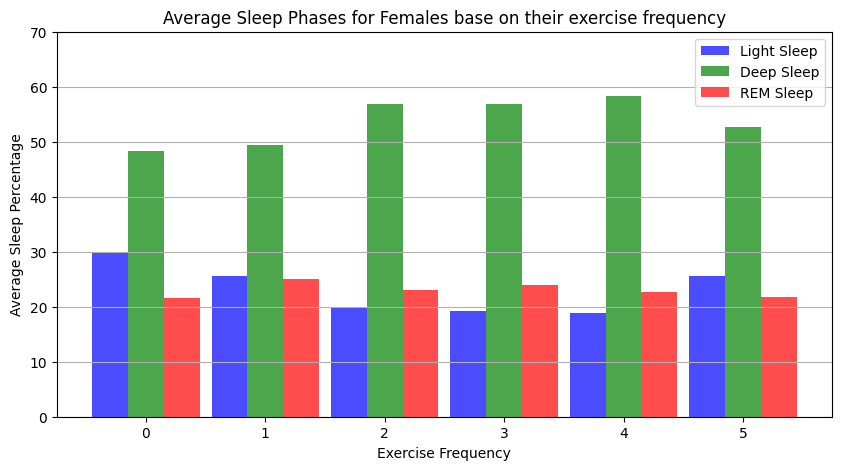

In [23]:
# Filter male data
male_data = data[data['Gender'] == 'Female'].copy()

# Extracting exercise data without loops
exercise_data0_male = male_data[male_data['Exercise frequency'] == 0].copy()
exercise_data1_male = male_data[male_data['Exercise frequency'] == 1].copy()
exercise_data2_male = male_data[male_data['Exercise frequency'] == 2].copy()
exercise_data3_male = male_data[male_data['Exercise frequency'] == 3].copy()
exercise_data4_male = male_data[male_data['Exercise frequency'] == 4].copy()
exercise_data5_male = male_data[male_data['Exercise frequency'] == 5].copy()

# Calculate the average sleep percentages
exercise_data0_male = [
    exercise_data0_male['Light sleep percentage'].mean(), 
    exercise_data0_male['Deep sleep percentage'].mean(), 
    exercise_data0_male['REM sleep percentage'].mean()
]

exercise_data1_male = [
    exercise_data1_male['Light sleep percentage'].mean(), 
    exercise_data1_male['Deep sleep percentage'].mean(), 
    exercise_data1_male['REM sleep percentage'].mean()
]

exercise_data2_male = [
    exercise_data2_male['Light sleep percentage'].mean(), 
    exercise_data2_male['Deep sleep percentage'].mean(), 
    exercise_data2_male['REM sleep percentage'].mean()
]

exercise_data3_male = [
    exercise_data3_male['Light sleep percentage'].mean(), 
    exercise_data3_male['Deep sleep percentage'].mean(), 
    exercise_data3_male['REM sleep percentage'].mean()
]

exercise_data4_male = [
    exercise_data4_male['Light sleep percentage'].mean(), 
    exercise_data4_male['Deep sleep percentage'].mean(), 
    exercise_data4_male['REM sleep percentage'].mean()
]

exercise_data5_male = [
    exercise_data5_male['Light sleep percentage'].mean(), 
    exercise_data5_male['Deep sleep percentage'].mean(), 
    exercise_data5_male['REM sleep percentage'].mean()
]

exercise_frequencies = ['0', '1', '2', '3', '4', '5']
light_sleep = [exercise_data0_male[0], exercise_data1_male[0], exercise_data2_male[0], exercise_data3_male[0], exercise_data4_male[0], exercise_data5_male[0]]
deep_sleep = [exercise_data0_male[1], exercise_data1_male[1], exercise_data2_male[1], exercise_data3_male[1], exercise_data4_male[1], exercise_data5_male[1]]
rem_sleep = [exercise_data0_male[2], exercise_data1_male[2], exercise_data2_male[2], exercise_data3_male[2], exercise_data4_male[2], exercise_data5_male[2]]

bar_width = 0.30
index = range(len(exercise_frequencies))

plt.figure(figsize=(10, 5))

plt.bar(index, light_sleep, width=bar_width, label='Light Sleep', color='b', alpha=0.7)
plt.bar([i + bar_width for i in index], deep_sleep, width=bar_width, label='Deep Sleep', color='g', alpha=0.7)
plt.bar([i + bar_width*2 for i in index], rem_sleep, width=bar_width, label='REM Sleep', color='r', alpha=0.7)

plt.xlabel('Exercise Frequency')
plt.ylabel('Average Sleep Percentage')
plt.title('Average Sleep Phases for Females base on their exercise frequency')
plt.xticks([i + bar_width for i in index], exercise_frequencies)
plt.legend()
plt.grid(axis='y')
plt.ylim(0, 70)
plt.show()


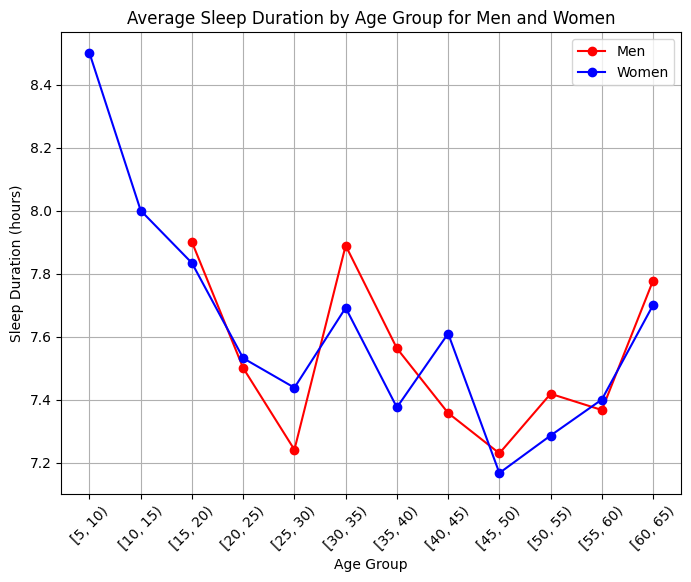

In [24]:
men_data = data[data['Gender'] == 'Male'].copy()
women_data = data[data['Gender'] == 'Female'].copy()


age_bins = range(5, 70, 5)  
men_data['Age Group'] = pd.cut(men_data['Age'], bins=age_bins, right=False)
women_data['Age Group'] = pd.cut(women_data['Age'], bins=age_bins, right=False)

men_grouped = men_data.groupby('Age Group', observed=False)['Sleep duration'].mean().reset_index()
women_grouped = women_data.groupby('Age Group', observed=False)['Sleep duration'].mean().reset_index()

plt.figure(figsize=(8, 6))

plt.plot(men_grouped['Age Group'].astype(str), men_grouped['Sleep duration'], marker='o', color='r', label='Men')
plt.plot(women_grouped['Age Group'].astype(str), women_grouped['Sleep duration'], marker='o', color='b', label='Women')

plt.xlabel('Age Group')
plt.ylabel('Sleep Duration (hours)')
plt.title('Average Sleep Duration by Age Group for Men and Women')

plt.xticks(rotation=45)  
plt.legend()
plt.grid(True)
plt.show()


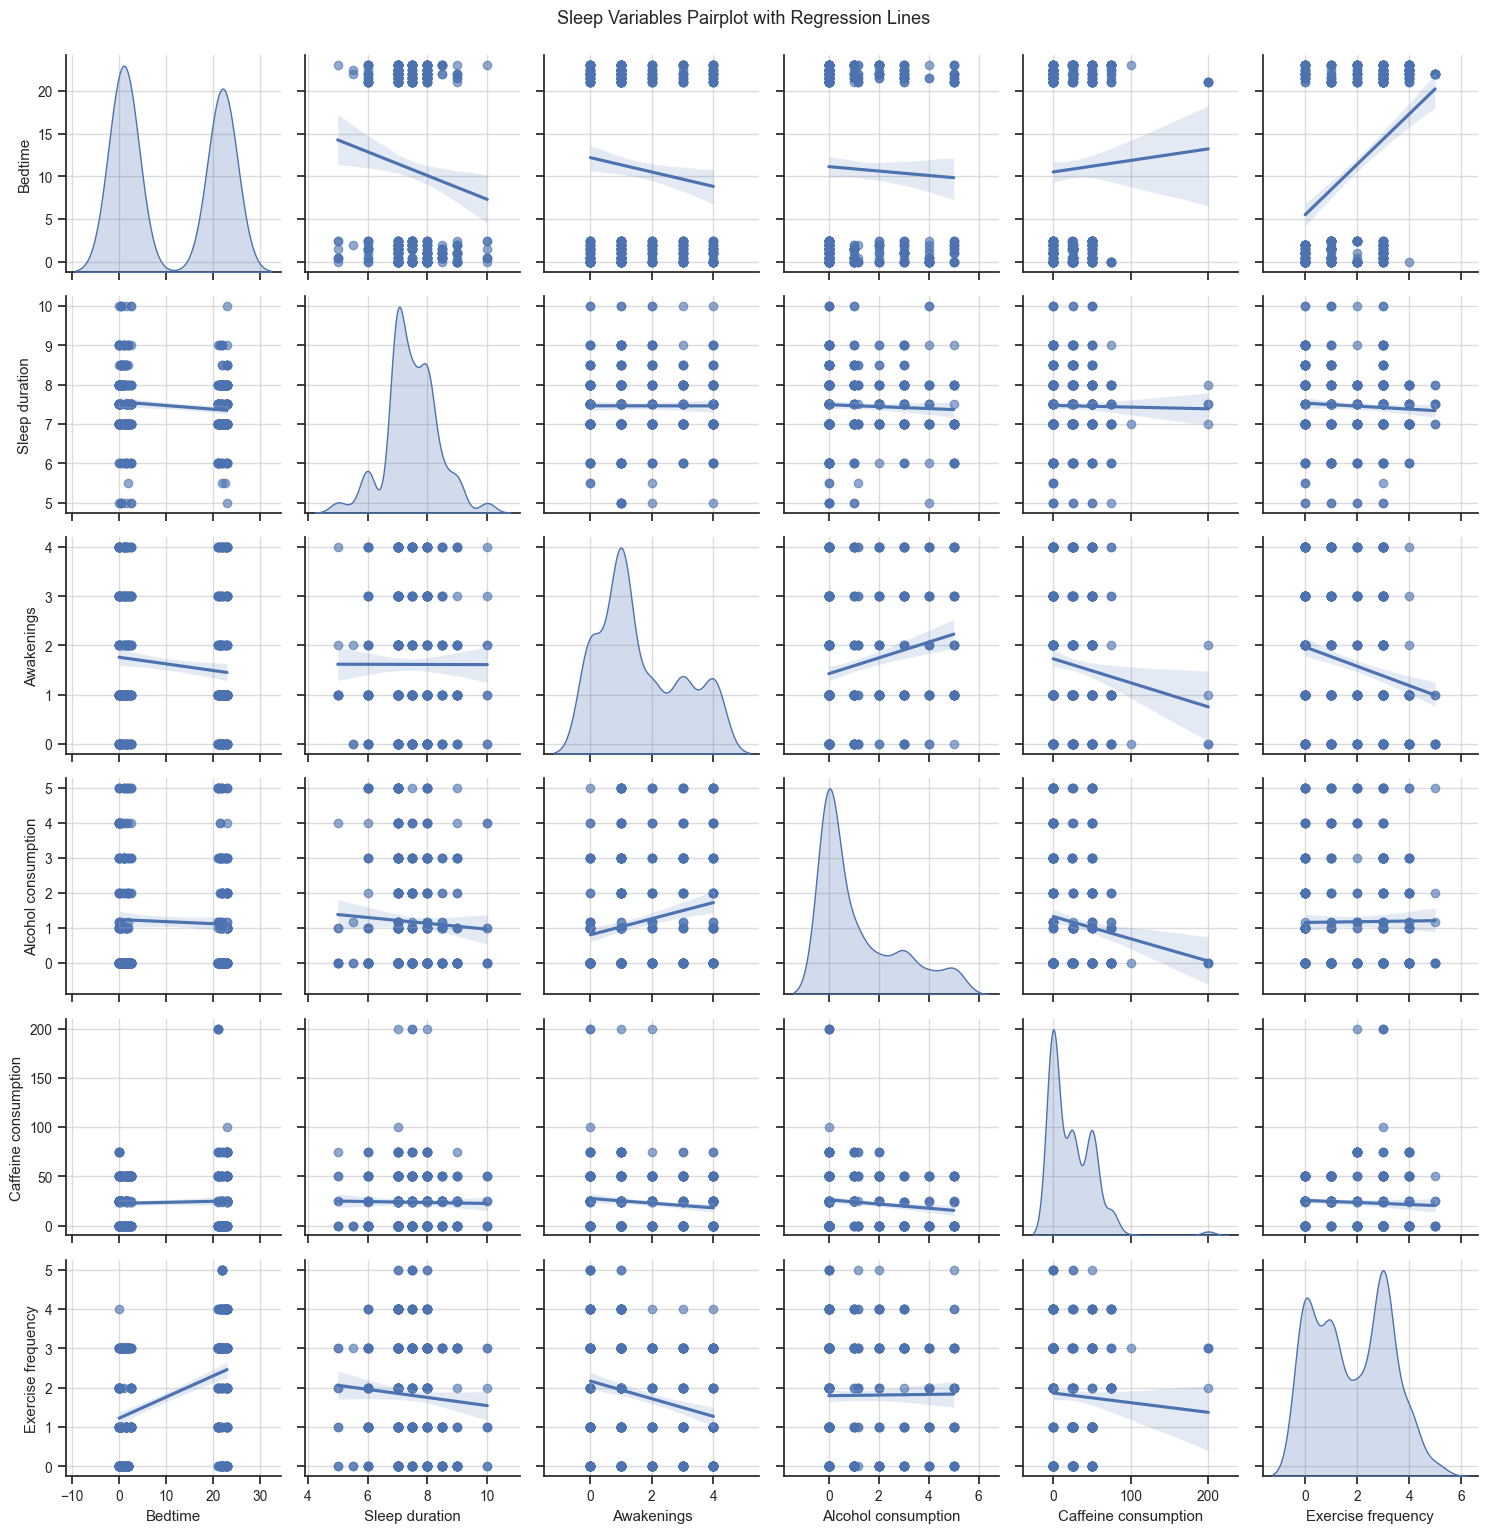

In [25]:
#pairwise scatterplot with regression line, diara
#category- men, women
# cols to use - bedtime, sleep duration, awakenings, alcohol nd caffeine consumption, exercise frequency
columns_to_plot = ['Bedtime', 'Sleep duration', 'Awakenings', 
                   'Alcohol consumption', 'Caffeine consumption', 
                   'Exercise frequency']

data_subset = data[columns_to_plot].copy()

data_subset['Bedtime'] = pd.to_datetime(data_subset['Bedtime']).dt.hour + pd.to_datetime(data_subset['Bedtime']).dt.minute / 60

sns.set(style="ticks", font_scale=0.9)
g = sns.pairplot(data_subset, kind="reg", diag_kind='kde', plot_kws={'scatter_kws': {'alpha': 0.6}})

plt.tight_layout()
plt.suptitle('Sleep Variables Pairplot with Regression Lines', y=1.02)

for ax in g.axes.flatten():
    ax.grid(True, linestyle='-', alpha=0.7)

plt.show()


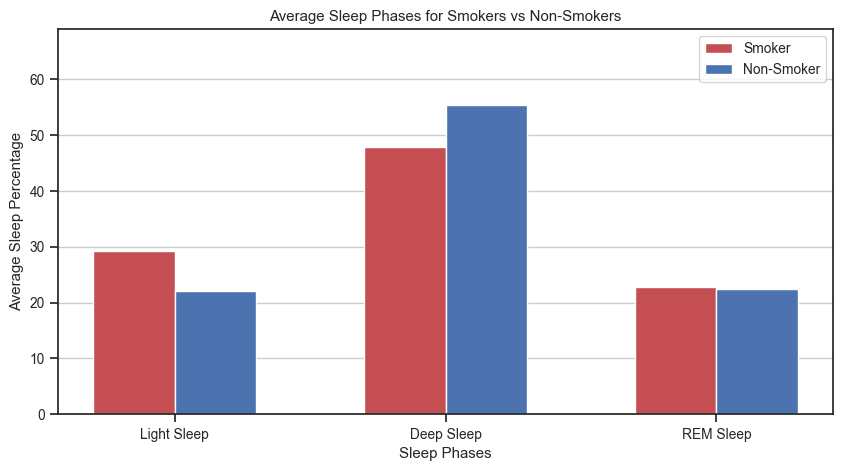

smoker means of all 3 sleep phases [29.337662337662337, 47.88961038961039, 22.772727272727273]
non smoker means of all 3 sleep phases [22.093959731543624, 55.37248322147651, 22.533557046979865]


In [26]:
#bar graph
#categories are light, deep, rem sleep
#cols to use - non smoker and smoker
smoker_data = data[data['Smoking status'] == 1].copy()
non_smoker_data = data[data['Smoking status'] == 0].copy()

smoker_means = [
    smoker_data['Light sleep percentage'].mean(), 
    smoker_data['Deep sleep percentage'].mean(), 
    smoker_data['REM sleep percentage'].mean()
]

non_smoker_means = [
    non_smoker_data['Light sleep percentage'].mean(), 
    non_smoker_data['Deep sleep percentage'].mean(), 
    non_smoker_data['REM sleep percentage'].mean()
]

sleep_phases = ['Light Sleep', 'Deep Sleep', 'REM Sleep']

plt.figure(figsize=(10, 5))

bar_width = 0.3
index = range(len(sleep_phases))

plt.bar(index, smoker_means, width=bar_width, label='Smoker', color='r', alpha=1)
plt.bar([i + bar_width for i in index], non_smoker_means, width=bar_width, label='Non-Smoker', color='b', alpha=1)

plt.xlabel('Sleep Phases')
plt.ylabel('Average Sleep Percentage')
plt.title('Average Sleep Phases for Smokers vs Non-Smokers')
plt.xticks([i + bar_width / 2 for i in index], sleep_phases)  
plt.legend()
plt.grid(axis='y')
plt.ylim(0, 69) 
plt.show()
print("smoker means of all 3 sleep phases",smoker_means)
print("non smoker means of all 3 sleep phases", non_smoker_means)

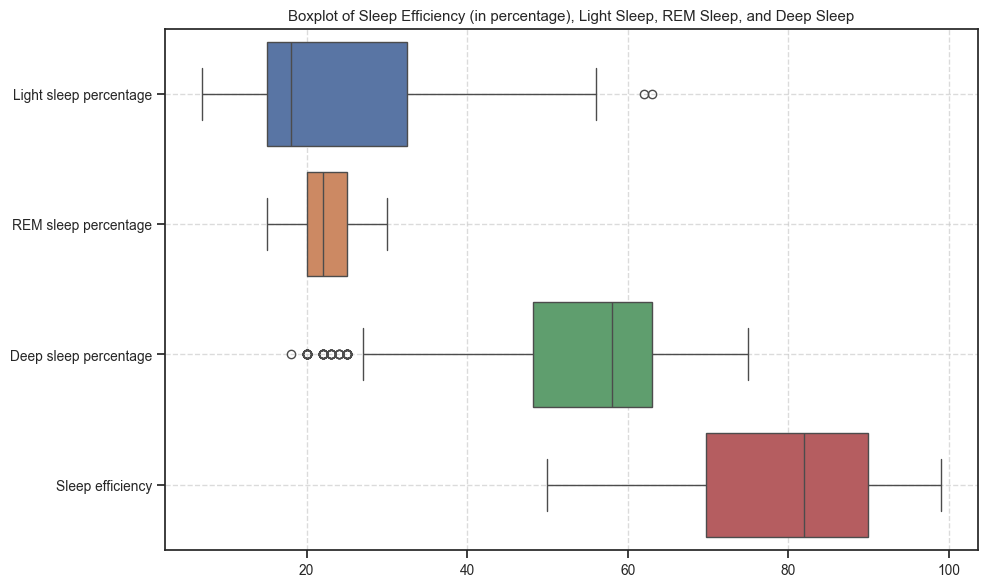

In [27]:
data_copy = data.copy()

data_copy['Sleep efficiency'] = data_copy['Sleep efficiency'] * 100

columns_for_boxplot = ['Light sleep percentage', 'REM sleep percentage', 'Deep sleep percentage', 'Sleep efficiency']

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_copy[columns_for_boxplot], orient='h')

plt.title('Boxplot of Sleep Efficiency (in percentage), Light Sleep, REM Sleep, and Deep Sleep')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


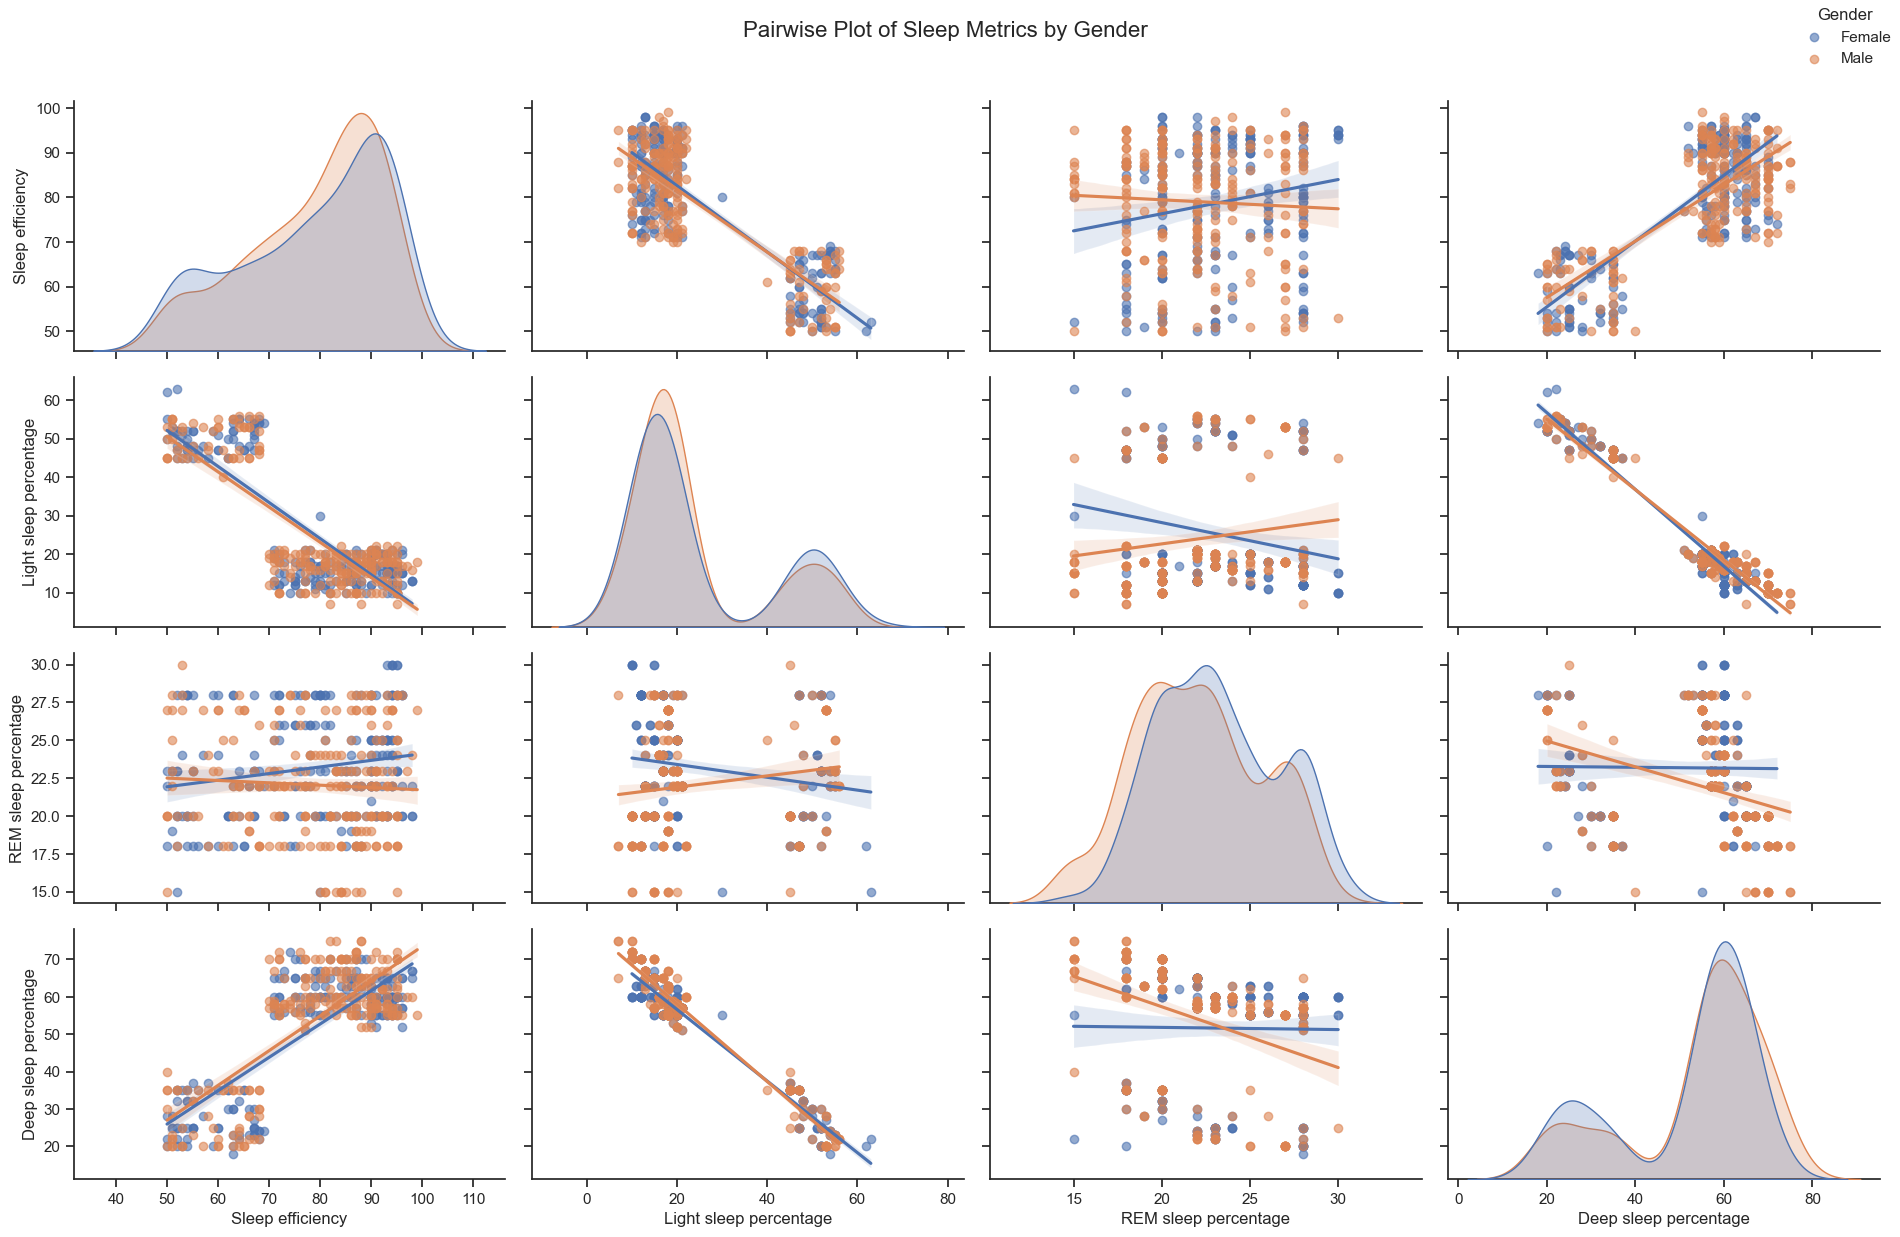

In [28]:
data_copy = data.copy()

data_copy['Sleep efficiency'] = data_copy['Sleep efficiency'] * 100

columns_for_pairplot = ['Sleep efficiency', 'Light sleep percentage', 'REM sleep percentage', 'Deep sleep percentage']

sns.set(style="ticks")
pairplot = sns.pairplot(data_copy, vars=columns_for_pairplot, hue='Gender', 
                         kind='reg', diag_kind='kde', plot_kws={'scatter_kws': {'alpha': 0.6}},
                        height=3, aspect=1.5)  


pairplot.fig.suptitle('Pairwise Plot of Sleep Metrics by Gender', y=1.02, fontsize=16)
pairplot._legend.set_bbox_to_anchor((1, 1))  
pairplot._legend.set_title('Gender')

plt.tight_layout()
plt.show()


<Axes: xlabel='Deep sleep percentage', ylabel='Sleep efficiency'>

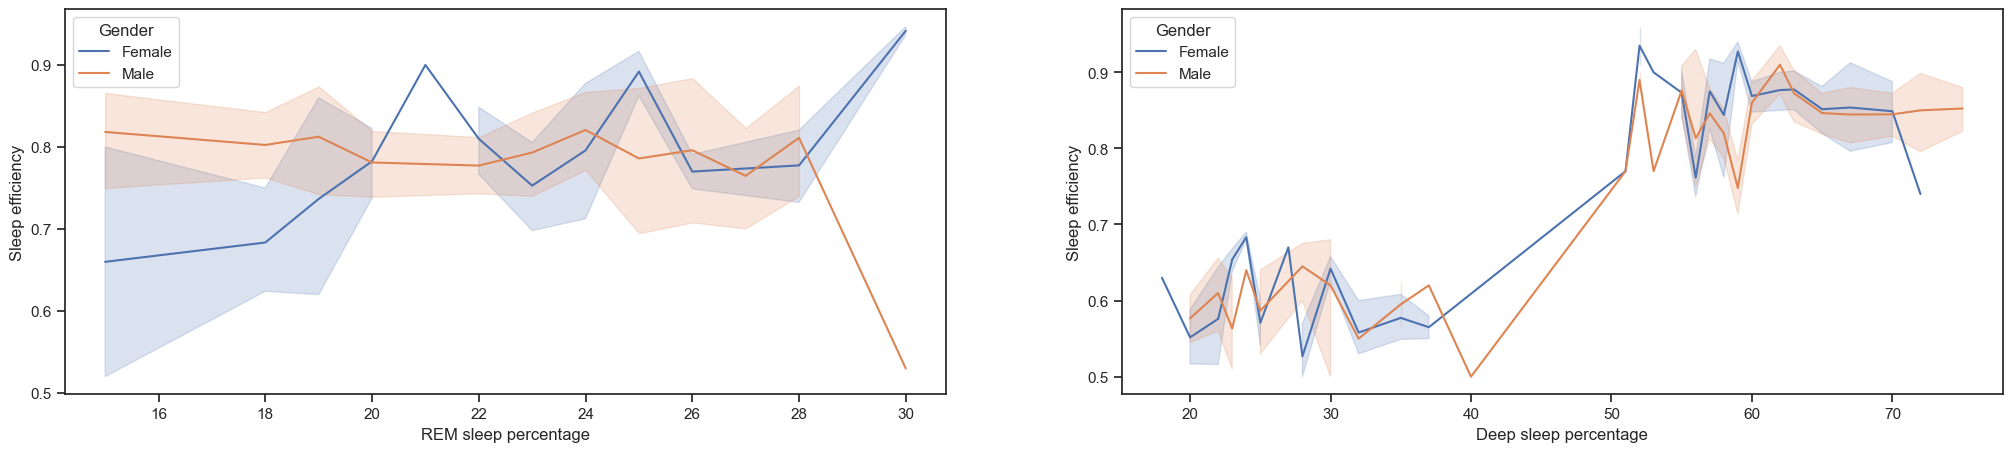

In [29]:
fig, axes = plt.subplots(1,2,figsize=(25,5))
sns.lineplot(x="REM sleep percentage", y="Sleep efficiency", data=data, hue="Gender", ax=axes[0])
sns.lineplot(x="Deep sleep percentage", y="Sleep efficiency", data=data, hue="Gender", ax=axes[1])


<Axes: xlabel='Sleep duration', ylabel='Sleep efficiency'>

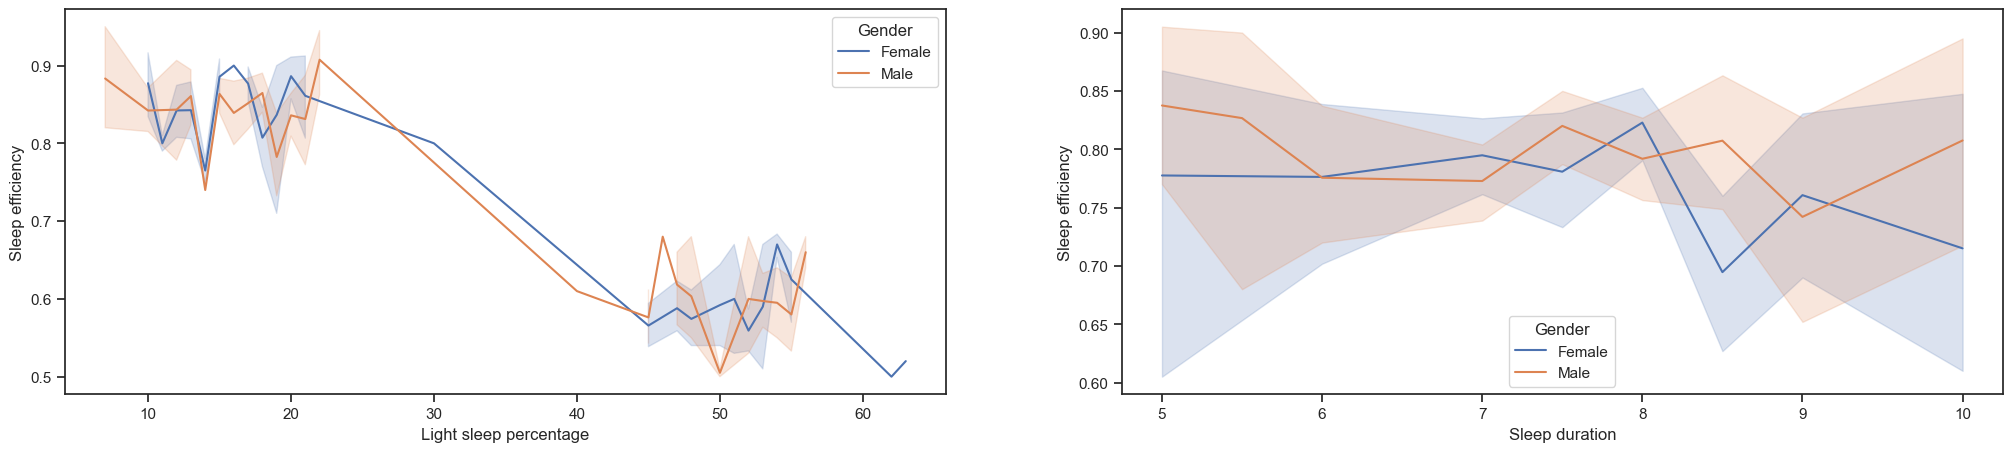

In [30]:
fig, axes = plt.subplots(1,2,figsize=(25,5))
sns.lineplot(x="Light sleep percentage", y="Sleep efficiency", data=data, hue="Gender", ax=axes[0])
sns.lineplot(x="Sleep duration", y="Sleep efficiency", data=data, hue="Gender", ax=axes[1])


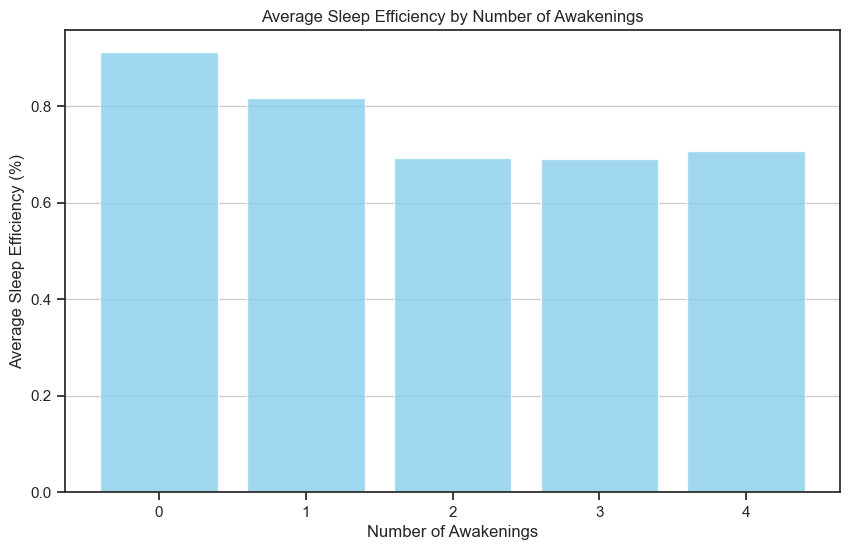

In [31]:
grouped_data = data.copy().groupby('Awakenings')['Sleep efficiency'].mean()

plt.figure(figsize=(10, 6))

plt.bar(grouped_data.index, grouped_data.values, color='skyblue', alpha=0.8)

plt.xlabel('Number of Awakenings')
plt.ylabel('Average Sleep Efficiency (%)')
plt.title('Average Sleep Efficiency by Number of Awakenings')

plt.grid(axis='y')
plt.show()

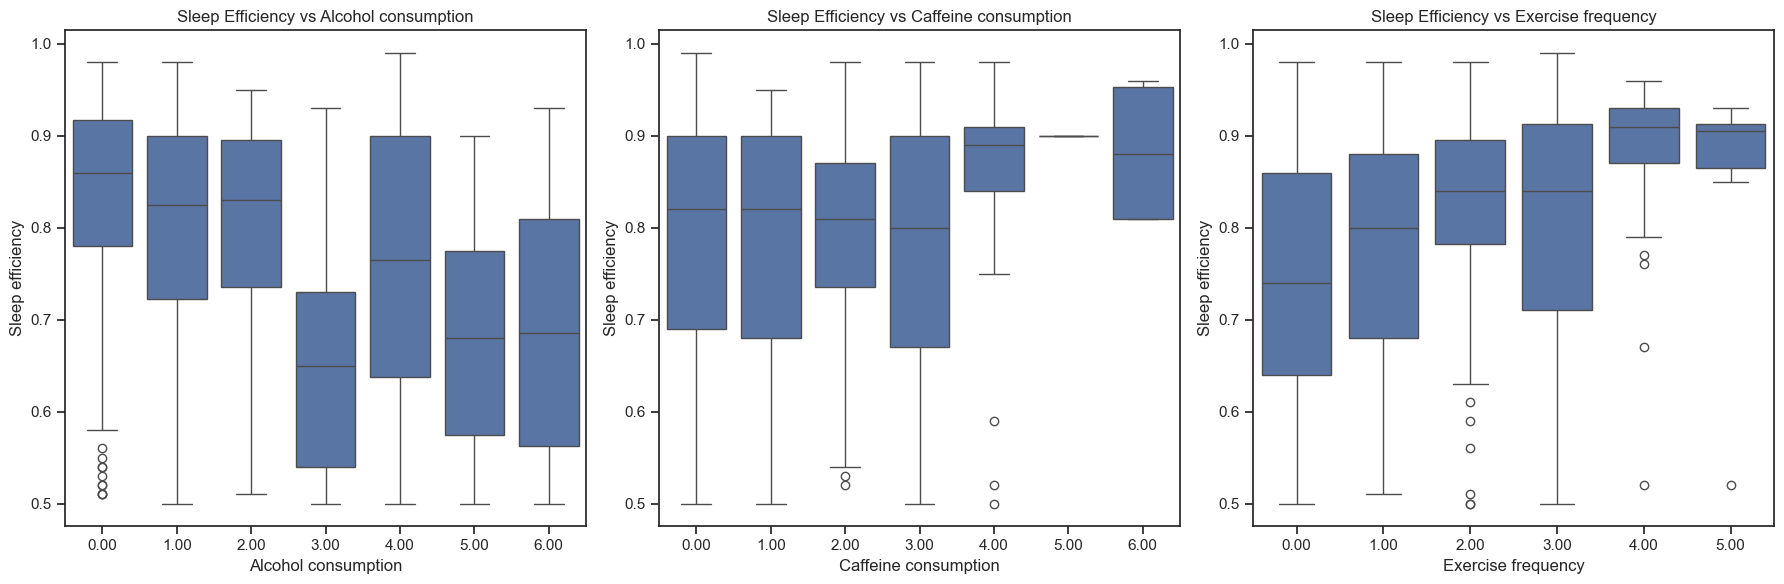

In [32]:

x = ['Alcohol consumption', 'Caffeine consumption', 'Exercise frequency']
y = 'Sleep efficiency'

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, x_var in enumerate(x):
    sns.boxplot(x=x_var, y=y, data=data, ax=axes[i])
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y)
    axes[i].set_title(f'Sleep Efficiency vs {x_var}')
    axes[i].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

plt.tight_layout()

plt.show()

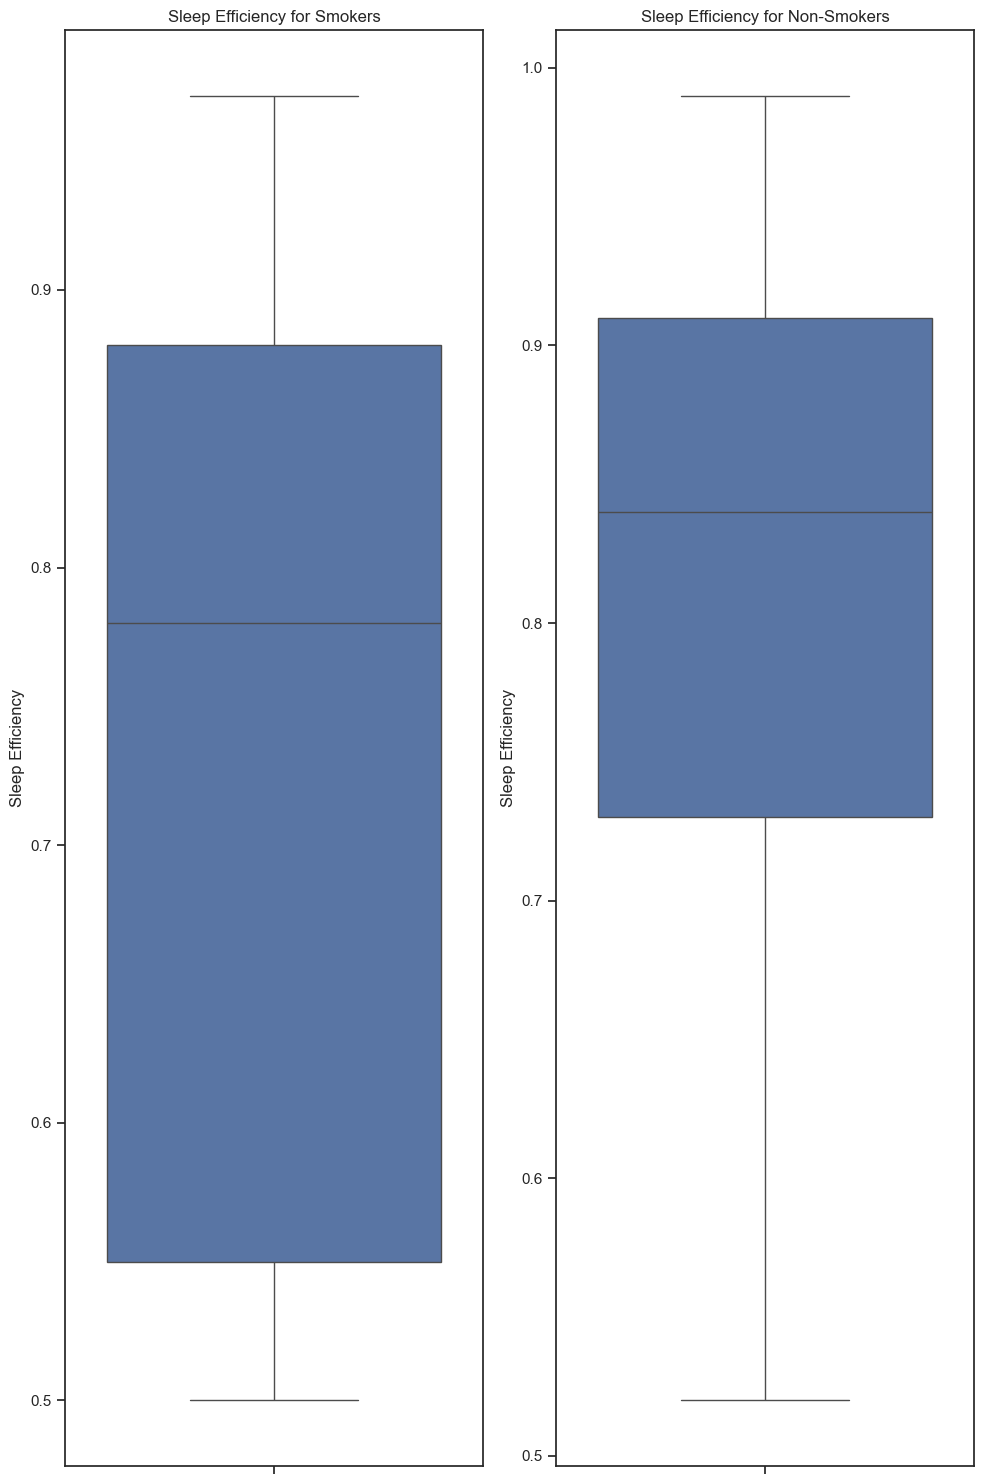

In [42]:

categories = {
    'Smokers': data[data['Smoking status'] == 1],
    'Non-Smokers': data[data['Smoking status'] == 0]
}

fig, axes = plt.subplots(1, len(categories), figsize=(10, 15))

for i, (category, category_data) in enumerate(categories.items()):
    sns.boxplot(y='Sleep efficiency', data=category_data, ax=axes[i])
    axes[i].set_title(f'Sleep Efficiency for {category}')
    axes[i].set_ylabel('Sleep Efficiency')

plt.tight_layout()
plt.show()